# Plot enrichment results from DAVID

In [22]:
import decoupler as dc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
WT_01_positive = pd.read_csv('../David/WT_01_positive.txt', sep='\t')
WT_01_negative = pd.read_csv('../David/WT_01_negative.txt', sep='\t')
WT_02_positive = pd.read_csv('../David/WT_02_positive.txt', sep='\t')
WT_02_negative = pd.read_csv('../David/WT_02_negative.txt', sep='\t')
MUT_01_positive = pd.read_csv('../David/MUT_01_positive.txt', sep='\t')
MUT_01_negative = pd.read_csv('../David/MUT_01_negative.txt', sep='\t')
MUT_02_positive = pd.read_csv('../David/MUT_02_positive.txt', sep='\t')
MUT_02_negative = pd.read_csv('../David/MUT_02_negative.txt', sep='\t')
data=[WT_01_positive, WT_01_negative, WT_02_positive, WT_02_negative, MUT_01_positive, MUT_01_negative, MUT_02_positive, MUT_02_negative]
df_names = ['WT_01_positive', 'WT_01_negative', 'WT_02_positive', 'WT_02_negative', 'MUT_01_positive', 'MUT_01_negative', 'MUT_02_positive', 'MUT_02_negative']

In [24]:
#subset a list of interesting pathways to focus on

plist=['Insulin signaling pathway', 'Insulin resistance', 'Insulin secretion', 'Glycolysis / Gluconeogenesis', 'JAK-STAT signaling pathway','Apoptosis']
subsets=[]

for i in data:
    i[['Pathway_id','Pathway']] = i['Term'].str.split(":", expand=True)
    i.index = i['Pathway']
    i = i.drop(['Term', 'Pathway'], axis=1)
    subset = i.loc[i.index.isin(plist)]
    subset = subset.sort_index()
    subsets.append(subset)
print(subsets)

[                                  Category  Count         %    PValue  \
Pathway                                                                 
Apoptosis                     KEGG_PATHWAY     11  6.111111  0.000049   
Glycolysis / Gluconeogenesis  KEGG_PATHWAY      5  2.777778  0.020307   
Insulin resistance            KEGG_PATHWAY      8  4.444444  0.001442   
Insulin secretion             KEGG_PATHWAY      7  3.888889  0.002173   
Insulin signaling pathway     KEGG_PATHWAY      8  4.444444  0.005486   
JAK-STAT signaling pathway    KEGG_PATHWAY      9  5.000000  0.004339   

                                                                          Genes  \
Pathway                                                                           
Apoptosis                     PARP1, BAD, GADD45A, MAPK1, KRAS, FOS, CTSV, T...   
Glycolysis / Gluconeogenesis                        G6PC2, PKM, GAPDH, DLD, GCK   
Insulin resistance            G6PC2, CPT1A, CREB1, NR1H3, IRS2, PPARA, PPARG...   

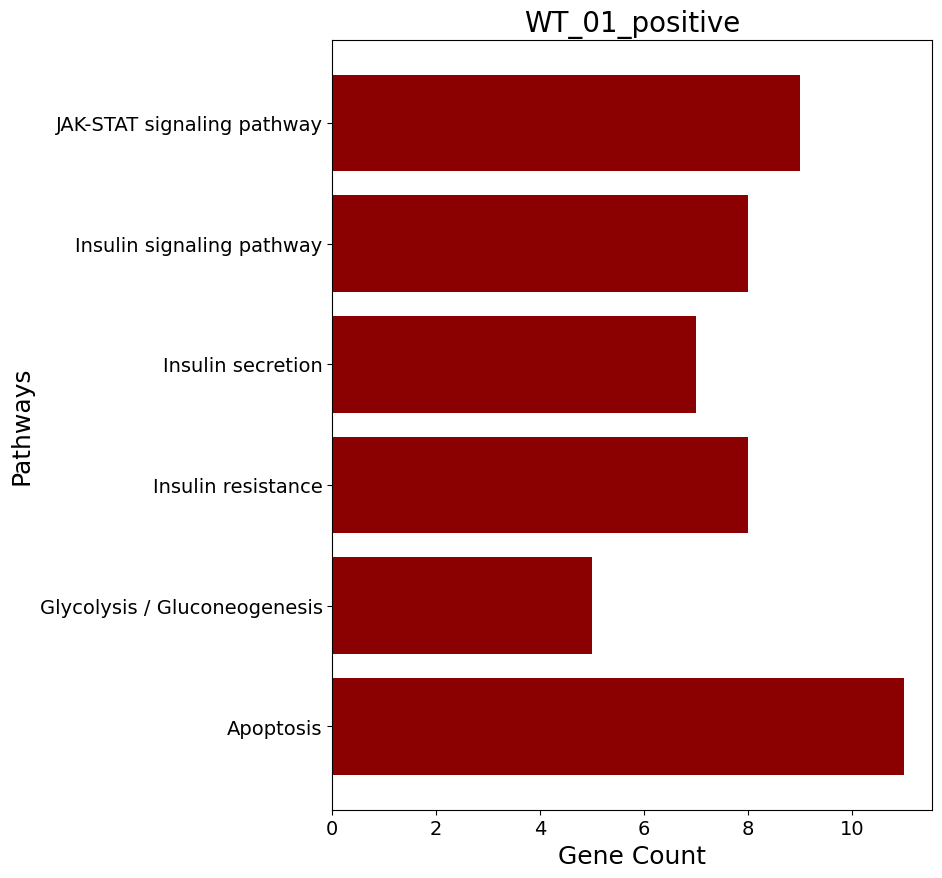

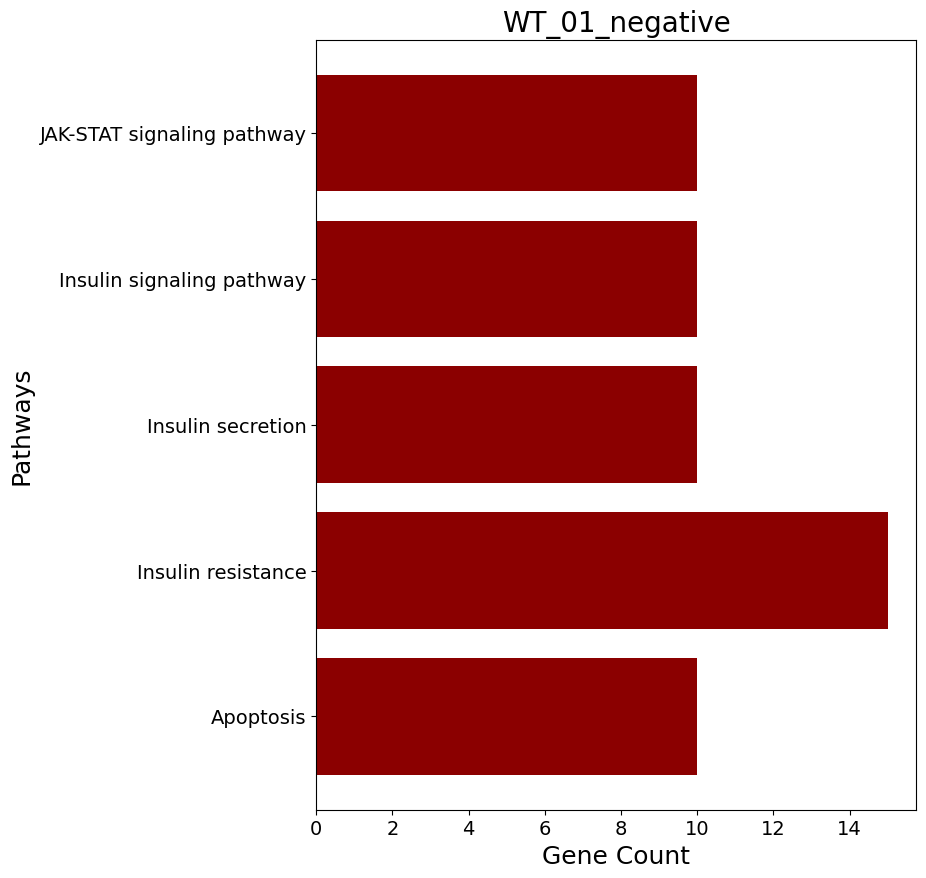

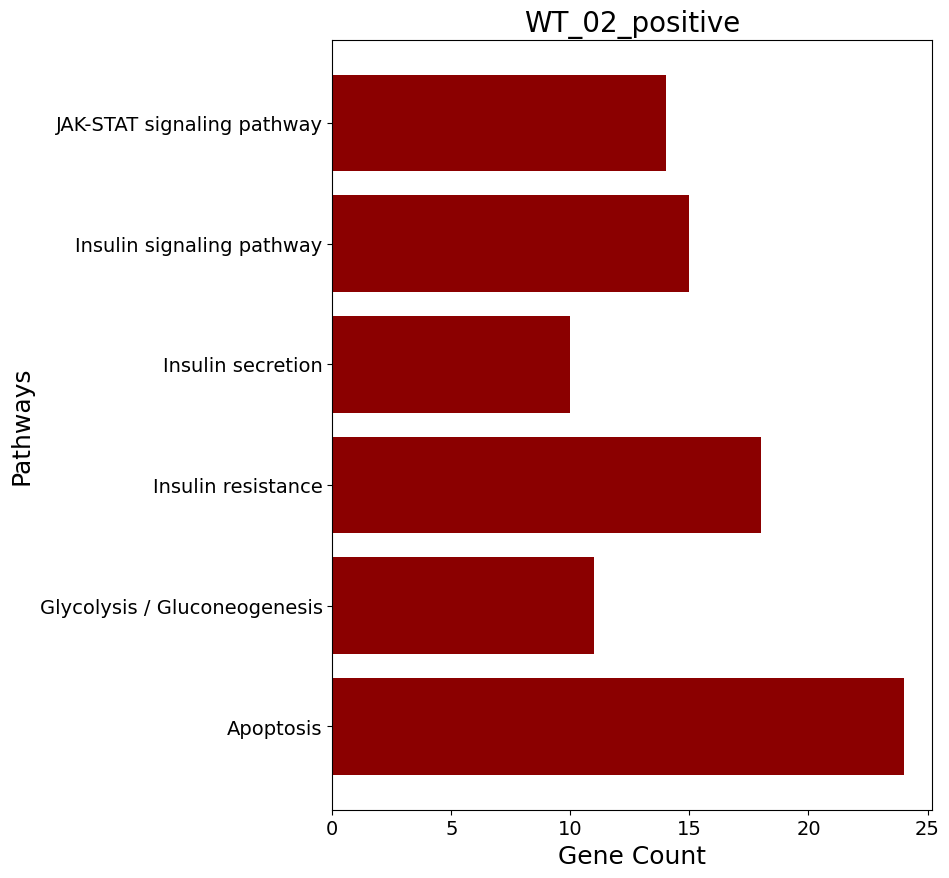

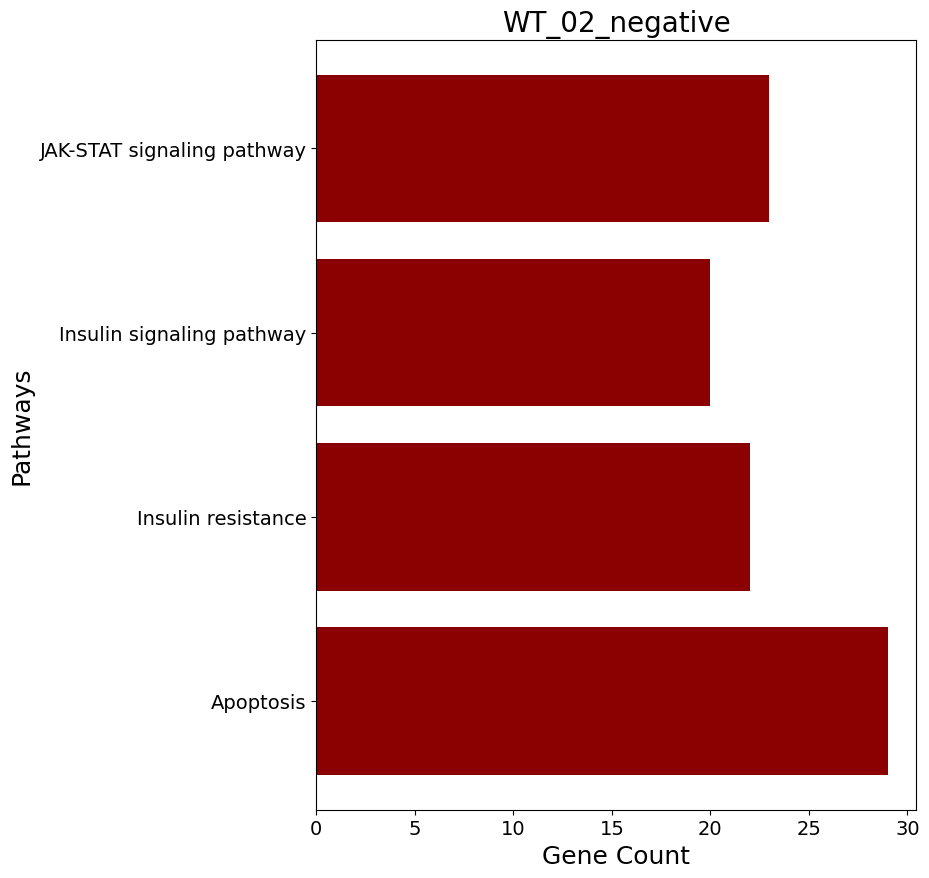

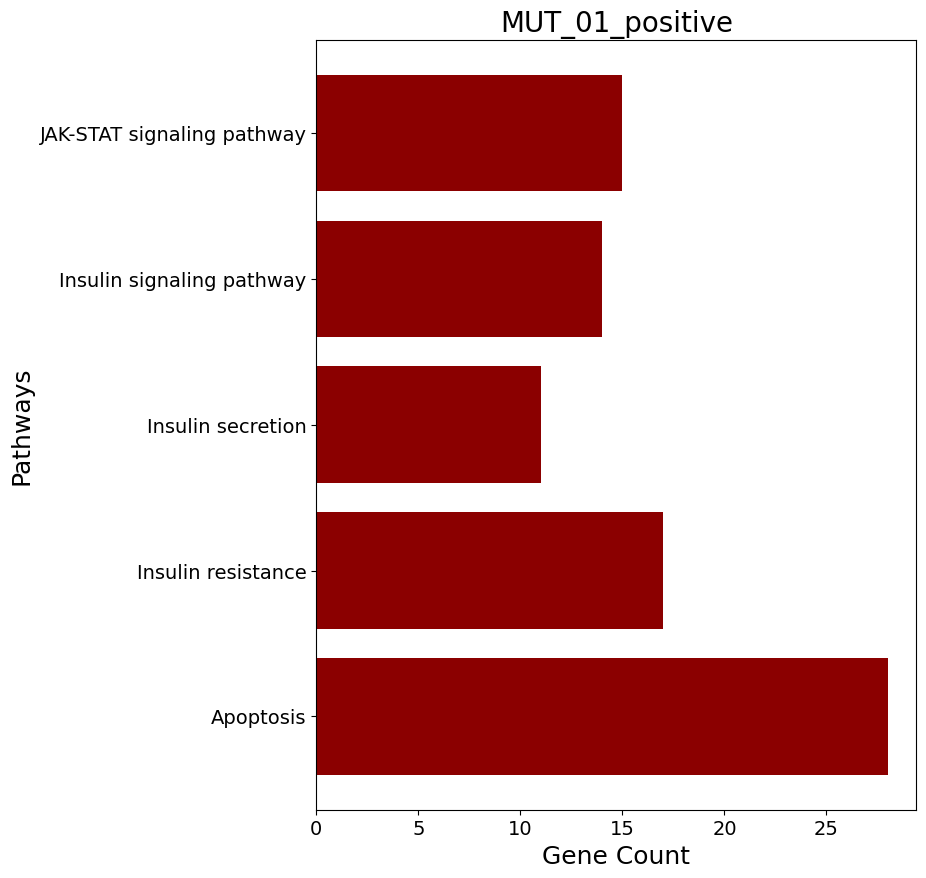

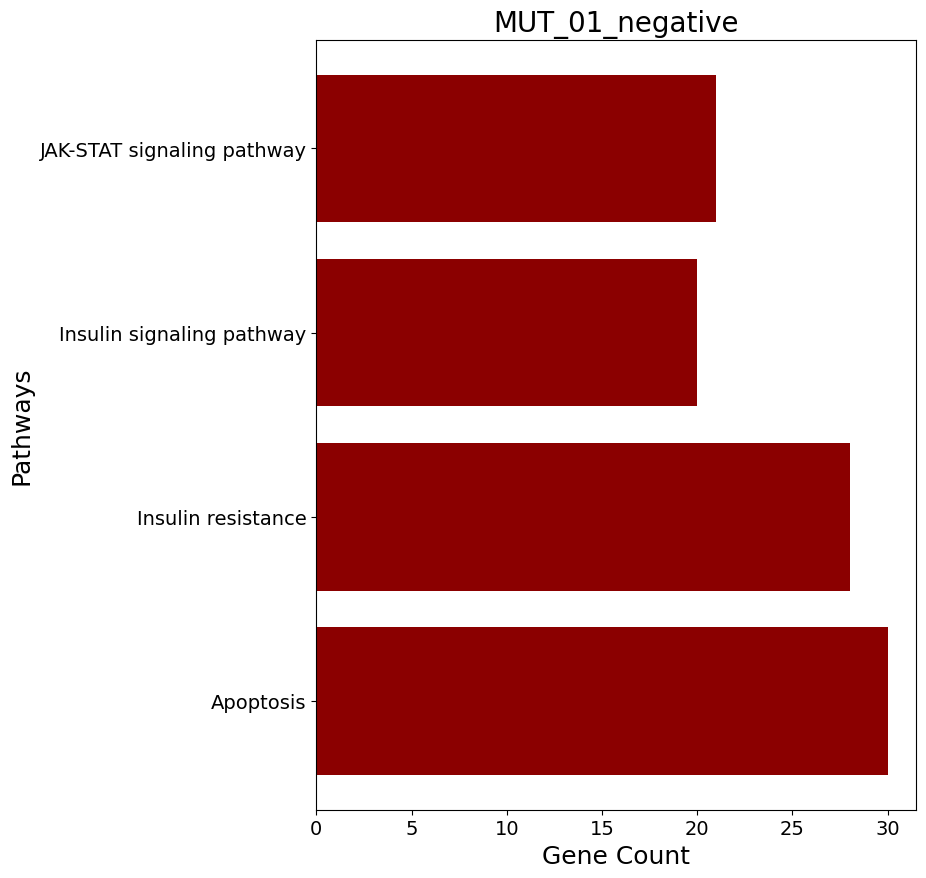

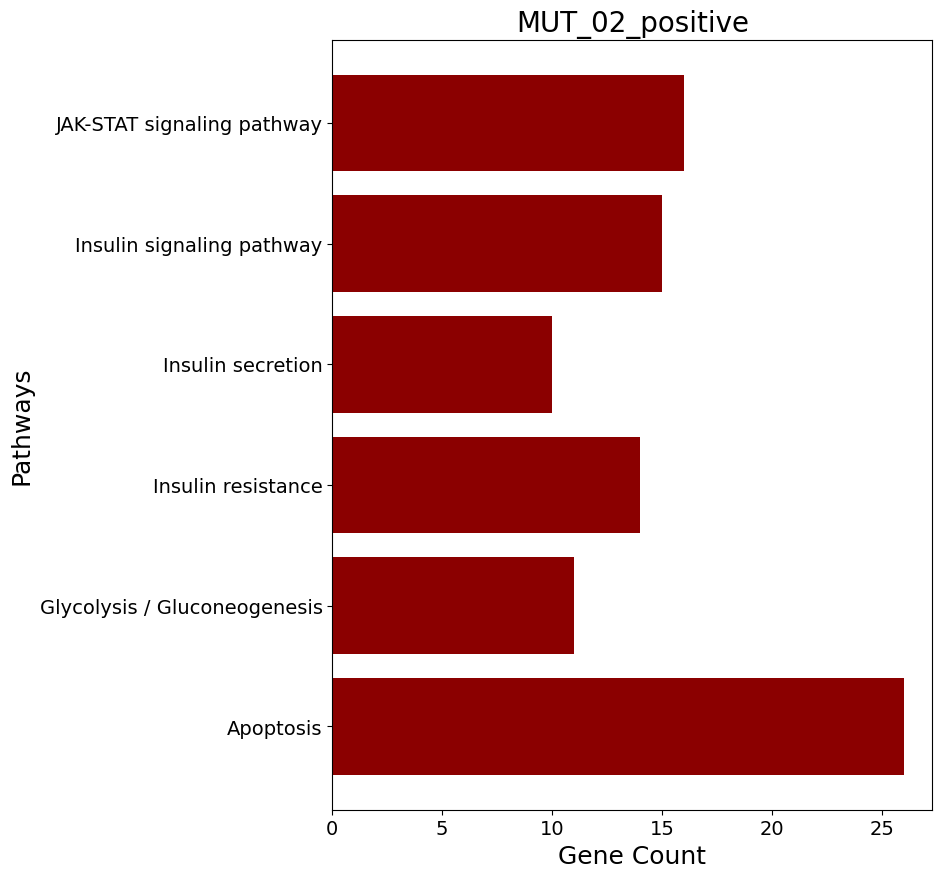

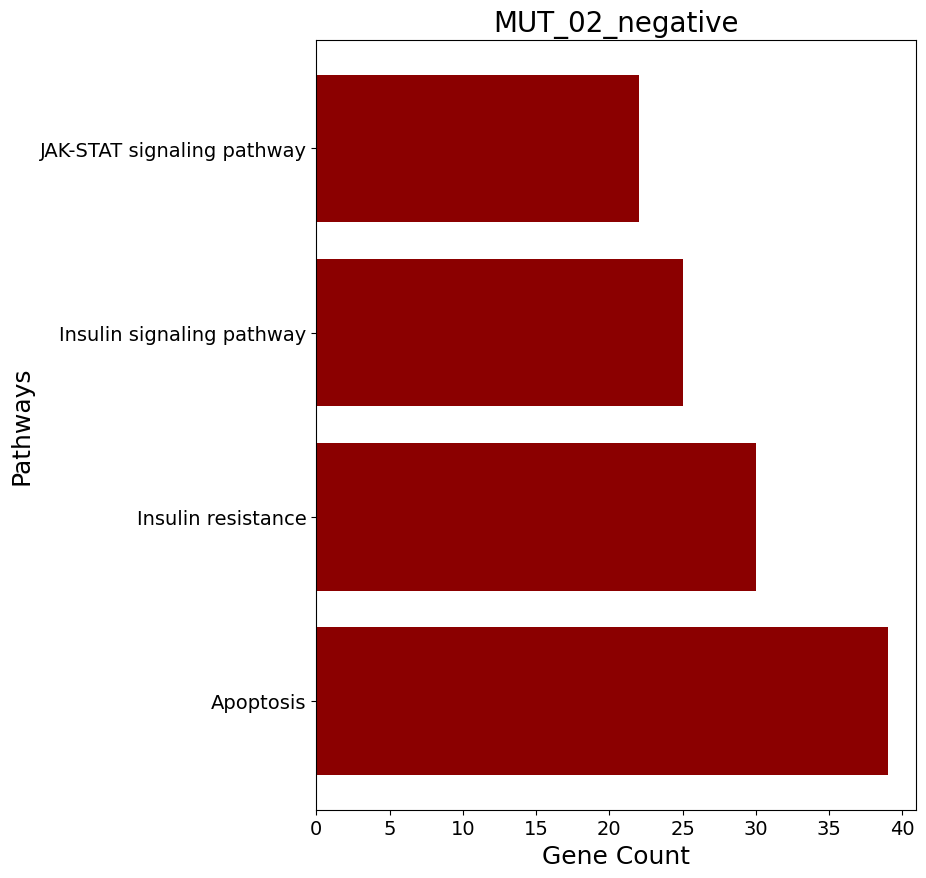

In [25]:
for i,j in zip(subsets, df_names):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(i.index, i['Count'], color='darkred')
    ax.set_xlabel('Gene Count', fontsize=18)
    ax.set_ylabel('Pathways', fontsize=18)
    ax.set_title(f'{j}', fontsize=20)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    plt.subplots_adjust(left=0.3)
    #plt.show()
    plt.savefig(f'../David/figures/david_{j}.png')